Dataset Information (Before Cleaning):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603629 entries, 0 to 603628
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR Number               603629 non-null  int64  
 1   Date Reported           603629 non-null  object 
 2   Date Occurred           603629 non-null  object 
 3   Time Occurred           603629 non-null  int64  
 4   Area ID                 603629 non-null  int64  
 5   Area Name               603629 non-null  object 
 6   Reporting District      603629 non-null  int64  
 7   Crime Code              603629 non-null  int64  
 8   Crime Code Description  603629 non-null  object 
 9   MO Codes                516418 non-null  object 
 10  Victim Age              517424 non-null  float64
 11  Victim Sex              593419 non-null  object 
 12  Victim Descent          592475 non-null  object 
 13  Premise Code            602670 non-

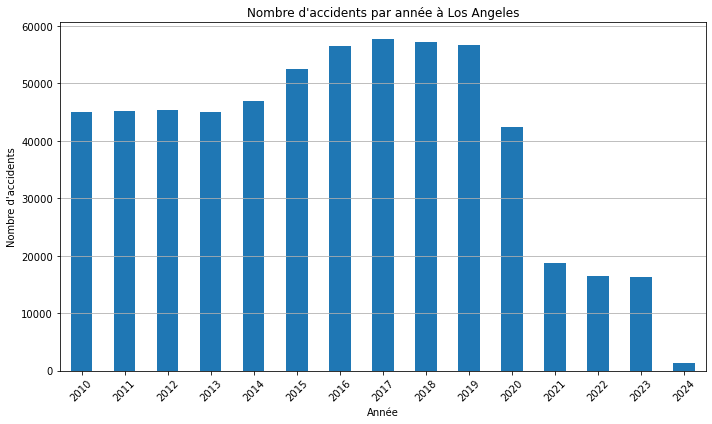

In [15]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import pandas as pd
import matplotlib.pyplot as plt 

# Path to the CSV file
chemin_fichier_csv = 'C:\DataScience\Traffic_Collision_Data_from_2010_to_Present_20240210.csv'

# Load CSV data into a DataFrame

df = pd.read_csv(chemin_fichier_csv)
# Display basic information about the dataset before cleaning
print("Dataset Information (Before Cleaning):")
print(df.info())

# Summary statistics before cleaning
print("\nSummary Statistics (Before Cleaning):")
print(df.describe())

# Check for missing values before cleaning
print("\nMissing Values (Before Cleaning):")
print(df.isnull().sum())

# Data cleaning
# Drop rows with missing values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Display basic information about the cleaned dataset
print("\nDataset Information (After Cleaning):")
print(df.info())

# Summary statistics of the cleaned dataset
print("\nSummary Statistics (After Cleaning):")
print(df.describe())

# Check for missing values in the cleaned dataset
print("\nMissing Values in Cleaned Dataset:")
print(df.isnull().sum())

# Supprimer les lignes avec des valeurs nulles
df = donnees.dropna()

# Supprimer les lignes avec des zéros dans toutes les colonnes
df = df[(df != 0).all(axis=1)]

# Supprimer les lignes avec des valeurs nulles dans toutes les colonnes spécifiées
donnees_nettoyees = donnees.dropna(subset=["Victim Age", "Victim Sex", "Victim Descent"], how='all')

# Chemin vers le nouveau fichier CSV
chemin_nouveau_csv = 'C:\DataScience\Traffic_Collision_Cleaned.csv'

# Enregistrer les données nettoyées dans un nouveau fichier CSV
donnees_nettoyees.to_csv(chemin_nouveau_csv, index=False)

# Afficher un message indiquant que le nouveau fichier CSV a été créé
print("Le nouveau fichier CSV a été créé avec succès :", chemin_nouveau_csv)

# Ouvrir le nouveau fichier CSV et compter le nombre de lignes
nouveau_df = pd.read_csv(chemin_nouveau_csv)
nombre_lignes = len(nouveau_df)

# Afficher le nombre de lignes du nouveau fichier CSV
print("Nombre de lignes dans le nouveau fichier CSV :", nombre_lignes)


# Convertir la colonne "Date Occurred" en type datetime
donnees["Date Occurred"] = pd.to_datetime(donnees["Date Occurred"])

# Extraire l'année à partir de la colonne "Date Occurred"
donnees["Year"] = donnees["Date Occurred"].dt.year

# Compter le nombre d'accidents par année
nombre_accidents_par_annee = donnees.groupby("Year").size()

# Visualiser le nombre d'accidents par année
plt.figure(figsize=(10, 6))
nombre_accidents_par_annee.plot(kind="bar")
plt.title("Nombre d'accidents par année à Los Angeles")
plt.xlabel("Année")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


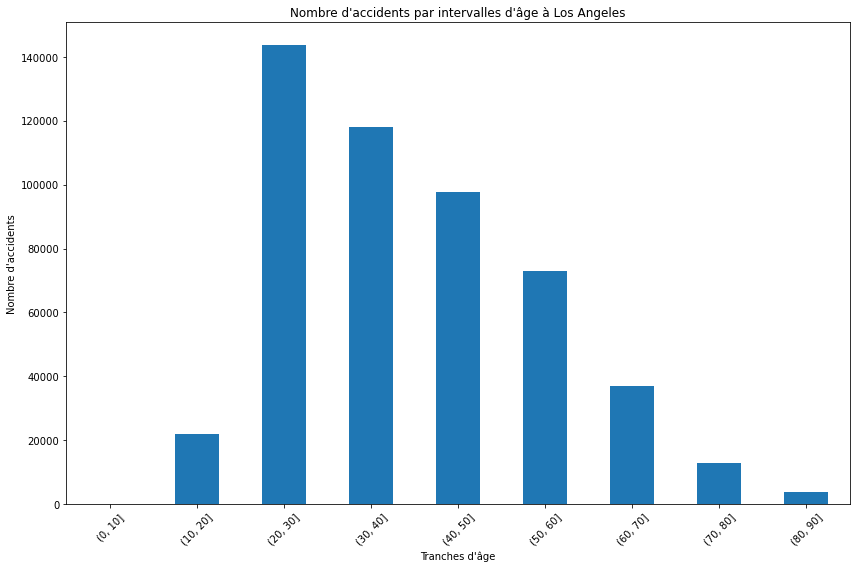

In [16]:
# Regrouper les tranches d'âge par intervalles de 10 ans
intervalles_age = pd.cut(donnees["Victim Age"], bins=range(0, 100, 10))

# Compter le nombre d'accidents par intervalles d'âge
accidents_par_intervalles_age = donnees.groupby(intervalles_age).size()

# Visualiser le nombre d'accidents par intervalles d'âge
plt.figure(figsize=(12, 8))
accidents_par_intervalles_age.plot(kind="bar")
plt.title("Nombre d'accidents par intervalles d'âge à Los Angeles")
plt.xlabel("Tranches d'âge")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

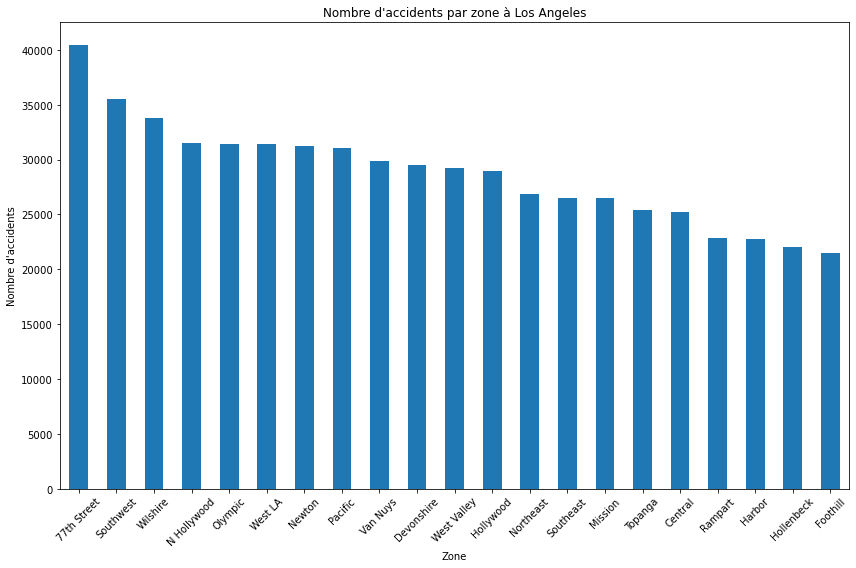

In [9]:
# Compter le nombre d'accidents par zone
accidents_par_zone = donnees["Area Name"].value_counts()

# Visualiser le nombre d'accidents par zone
plt.figure(figsize=(12, 8))
accidents_par_zone.plot(kind="bar")
plt.title("Nombre d'accidents par zone à Los Angeles")
plt.xlabel("Zone")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


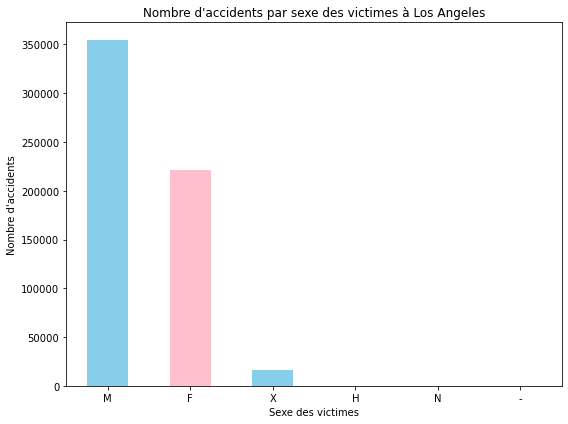

In [10]:
# Compter le nombre d'accidents par sexe des victimes
accidents_par_sexe = donnees["Victim Sex"].value_counts()

# Définir les couleurs pour chaque sexe
couleurs = ["skyblue", "pink"]

# Visualiser le nombre d'accidents par sexe des victimes avec des couleurs personnalisées
plt.figure(figsize=(8, 6))
accidents_par_sexe.plot(kind="bar", color=couleurs)
plt.title("Nombre d'accidents par sexe des victimes à Los Angeles")
plt.xlabel("Sexe des victimes")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()